<a href="https://colab.research.google.com/github/Vik-Gt-321/Food-Image-Classifier-/blob/main/TransferLearningFineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fine Tuning

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-01 08:20:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-01 08:20:09 (72.6 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-08-01 08:20:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   126MB/s    in 1.3s    

2021-08-01 08:20:10 (126 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback

In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
from helper_functions import walk_through_dir
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen  =ImageDataGenerator(rescale  =1/255.0)
# test_datagen = ImageDataGenerator(rescale =1/255.0)
# old way to do things ^

# we don't need to create an image datagen
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical",
                                                                  image_size =(224,224),
                                                                 batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode ="categorical",
                                                                image_size =(224,224) )


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The above function batchifies the data, which is perfect for our deep learning model

In [ ]:
test_data
# one hot encoded 

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
len(train_data)

24

In [ ]:
# for images, labels in train_data.take(1):
#   print(images, labels)

## Model 0 

We take the effnet model as the base layer. We don't need the top layer of basemodel as it is teh output layer of effnet trained on ImageNet images.

Using functional api, we create an input layer that has shape and name params.

Use functional API to further add on GlobalAveragePool layer and then create a dense layer to output our image class.

So we have 4 layers in model_0:
* input_layer.
* base_model.
* GlobalMaxPool
* Dense i.e output layer

The output from GlobalPool is the features extracted by the base_model


In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False                                                         #trainable = False)
inputs = tf.keras.layers.Input(shape = (224,224,3), name = "Input_Layer")
#x = tf.keras.layers(Dense(1, activation = "relu"))(inputs)

# if using resnet you need to rescale model
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x = base_model(inputs)
print(x.shape)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avg_pool_layer")(x)
print(f"shape after gp {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="relu", name = "output_layer")(x)
outputs.shape
model_0= tf.keras.Model(inputs, outputs)

model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])
history_0 = model_0.fit(train_data,epochs =5, steps_per_epoch = len(train_data),
                        validation_data = test_data, validation_steps = int(0.25*len(test_data)),
                        callbacks= [create_tensorboard_callback("Tf_hub", "model_0")])


(None, 7, 7, 1280)
shape after gp (None, 1280)
Saving TensorBoard log files to: Tf_hub/model_0/20210801-082017
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 86s 3s/step - loss: 5.7032 - accuracy: 0.2853 - val_loss: 3.1333 - val_accuracy: 0.4786
Epoch 2/5
24/24 [==============================] - 67s 3s/step - loss: 2.9917 - accuracy: 0.5467 - val_loss: 2.7051 - val_accuracy: 0.6086
Epoch 3/5
24/24 [==============================] - 68s 3s/step - loss: 2.9344 - accuracy: 0.6253 - val_loss: 2.7168 - val_accuracy: 0.6480
Epoch 4/5
24/24 [==============================] - 78s 3s/step - loss: nan - accuracy: 0.3093 - val_loss: nan - val_accuracy: 0.1020
Epoch 5/5
24/24 [==============================] - 78s 3s/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0938


In [ ]:
model_0.evaluate(test_data)
for layer_no, layer in enumerate(base_model.layers):
  print(layer_no, layer.name)

79/79 [==============================] - 121s 2s/step - loss: nan - accuracy: 0.1000
0 input_2
1 rescaling_4
2 normalization_1
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add


In [ ]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape )
print(f"shape of input: {input_tensor.shape}")

output = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(output)
print(f"shape of output: {output.shape}")

output_max = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(output_max)
print(f"shape of output_max: {output_max.shape}")


shape of input: (1, 4, 4, 3)
tf.Tensor([[-0.09368646 -0.45840445 -0.28855976]], shape=(1, 3), dtype=float32)
shape of output: (1, 3)
tf.Tensor([[0.9058464 1.1603122 1.6994323]], shape=(1, 3), dtype=float32)
shape of output_max: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis = [1,2])
tf.reduce_max(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Experiments

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-08-01 08:29:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   165MB/s    in 0.8s    

2021-08-01 08:29:06 (165 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
train_dir_1pc = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There a

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                 label_mode ="categorical",image_size = (224,224),
                                                                 batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                 label_mode ="categorical",image_size = (224,224),
                                                                 batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Data Augmentation
from tensorflow.keras.layers.experimental import preprocessing
data_aug = tf.keras.Sequential([
                                       preprocessing.RandomFlip("horizontal"),
                                preprocessing.RandomRotation(0.2),
                                preprocessing.RandomZoom(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.Rescaling(1/255.0),
                               
],  name = ("data_aug_layer"))


Processing happens in GPU, in contrast to ImageDataGen.
Image Augmentation happens only in training, so we can export the whole model.

(-0.5, 448.5, 538.5, -0.5)

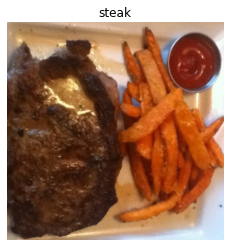

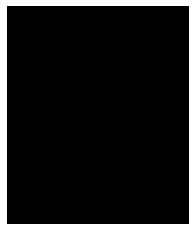

In [ ]:
# view a random image and compare it to its augmented image
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import os

target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train" + "/" + target_class
random_image = random.choice(os.listdir(target_dir))
img = mpimg.imread(target_dir + "/" + random_image )

plt.imshow(img)
plt.title(target_class)
plt.axis("off")



aug_img = data_aug(tf.expand_dims(img, axis =0))
plt.figure()
# print(aug_img)
plt.imshow(tf.squeeze(aug_img)/255.)
plt.axis("off")

## Model_1

In [ ]:
base_model_1 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model_1.trainable = False

inputs_1 = tf.keras.layers.Input(shape =(224,224, 3), name = "Input_layer")

x = data_aug(inputs_1)
x = base_model_1(x)
x = tf.keras.layers.GlobalAveragePooling2D(name = "GAP2D")(x)

output = tf.keras.layers.Dense(10, activation="softmax", name = "OP")(x)

model_1 = tf.keras.Model(inputs_1, output)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])
history_1 = model_1.fit(train_data,epochs =5, steps_per_epoch = len(train_data),
                       validation_data = test_data, validation_steps = int(0.25*len(test_data)),
                       callbacks=[create_tensorboard_callback("Tf_hub", "model_1")])

Saving TensorBoard log files to: Tf_hub/model_1/20210801-082912
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 91s 4s/step - loss: 2.3480 - accuracy: 0.0853 - val_loss: 2.3057 - val_accuracy: 0.0921
Epoch 2/5
24/24 [==============================] - 83s 4s/step - loss: 2.3261 - accuracy: 0.0907 - val_loss: 2.3035 - val_accuracy: 0.1003
Epoch 3/5
24/24 [==============================] - 82s 3s/step - loss: 2.3339 - accuracy: 0.1013 - val_loss: 2.2996 - val_accuracy: 0.1201
Epoch 4/5
24/24 [==============================] - 72s 3s/step - loss: 2.3406 - accuracy: 0.0893 - val_loss: 2.3101 - val_accuracy: 0.1020
Epoch 5/5
24/24 [==============================] - 70s 3s/step - loss: 2.3349 - accuracy: 0.0880 - val_loss: 2.3031 - val_accuracy: 0.0954


79/79 [==============================] - 123s 2s/step - loss: 2.3045 - accuracy: 0.1000


[2.3045263290405273, 0.10000000149011612]

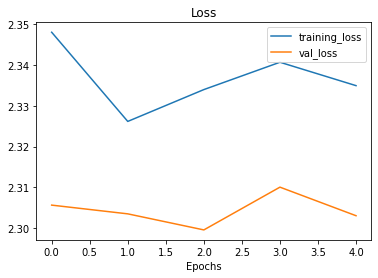

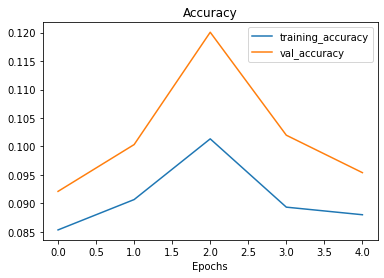

In [ ]:
plot_loss_curves(history_1)
model_1.evaluate(test_data)

## Model_2

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2021-08-01 08:40:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   126MB/s    in 1.3s    

2021-08-01 08:40:32 (126 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [ ]:
train_dir_10percent = "10_food_classes_10_percent/train/"
test_dir_10percent = "10_food_classes_10_percent/test/"
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [ ]:
train_data_10percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10percent,
                                                                           label_mode = "categorical",
                                                                           image_size =(224,224))
test_data_10percent  =tf.keras.preprocessing.image_dataset_from_directory(test_dir_10percent, 
                                                                          label_mode ="categorical",
                                                                          image_size =(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_aug = tf.keras.Sequential([
                                preprocessing.RandomFlip("horizontal"),
                                preprocessing.RandomRotation(0.2),
                                preprocessing.RandomZoom(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.Rescaling(1/255.0)
], name = "DataAuglayer")

In [ ]:
base_model_2 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model_2.trainable = False

inputs =tf.keras.layers.Input(shape = (224,224,3),  name = "IP_layer")
x = data_aug(inputs)
x = base_model_2(x, training  =False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "GAP2D")(x)

output = tf.keras.layers.Dense(10, activation="softmax", name = "OP")(x)

model_2 = tf.keras.Model(inputs, output)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])


## Model checkpoint callback

In [ ]:
checkpoint_path = "tenpercent_checkpoint_weights/checkpoint.ckpt"
checkpoint_callback=  tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True,
                                                         verbose =1)

In [ ]:
history_2 = model_2.fit(train_data,epochs =5, steps_per_epoch = len(train_data),
                       validation_data = test_data, validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback("Tf_hub", "model_2"),
                                     checkpoint_callback])

Saving TensorBoard log files to: Tf_hub/model_2/20210801-084038
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 88s 3s/step - loss: 2.3291 - accuracy: 0.0813 - val_loss: 2.3050 - val_accuracy: 0.0954

Epoch 00001: saving model to tenpercent_checkpoint_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 79s 3s/step - loss: 2.3251 - accuracy: 0.1027 - val_loss: 2.3013 - val_accuracy: 0.1135

Epoch 00002: saving model to tenpercent_checkpoint_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 72s 3s/step - loss: 2.3232 - accuracy: 0.1147 - val_loss: 2.3056 - val_accuracy: 0.0872

Epoch 00003: saving model to tenpercent_checkpoint_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 73s 3s/step - loss: 2.3164 - accuracy: 0.1013 - val_loss: 2.3066 - val_accuracy: 0.1069

Epoch 00004: saving model to tenpercent_checkpoint_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 85s 4s/step - loss: 2.3215 - accuracy: 0.0840 - val_loss: 2.3065 - val_accuracy: 0.0724

Epoch 0000

## Load weights

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results =model_2.evaluate(test_data)

79/79 [==============================] - 124s 2s/step - loss: 2.3056 - accuracy: 0.1000


In [ ]:
import numpy as np
np.isclose(np.array(loaded_weights_model),np.array(model_2.evaluate(test_data)))

79/79 [==============================] - 125s 2s/step - loss: 2.3056 - accuracy: 0.1000


array([False,  True])

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff908617190> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff8fadb4210> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7ff8fa060810> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7ff908617090> True
<tensorflow.python.keras.layers.core.Dense object at 0x7ff8fa03dd90> True


In [ ]:
# for i , layer in enumerate(model_2.layers[2].layers):
#   print(i, layer.name, layer.trainable)

In [ ]:
base_model_2.trainable = True
for layer in base_model_2.layers[:-10]:
  layer.trainable = False

In [ ]:
# for i , layer in enumerate(model_2.layers[2].layers):
#   print(i, layer.name, layer.trainable)

In [ ]:
model_2.compile(loss  ="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.0001),
                metrics =["accuracy"])

In [ ]:
for i , layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_8 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
history_2_aug_data = model_2.fit(train_data_10percent, validation_data=test_data_10percent,
                                 validation_steps = int(0.25*len(test_data_10percent)),
                                 epochs =10,
                                 steps_per_epoch = len(train_data_10percent),
                                 initial_epoch = history_2.epoch[-1],
                                 callbacks = [create_tensorboard_callback("Tf_hub","model_2_ft")])

Saving TensorBoard log files to: Tf_hub/model_2_ft/20210801-085258
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 83s 3s/step - loss: 2.3118 - accuracy: 0.1000 - val_loss: 2.3099 - val_accuracy: 0.0855
Epoch 6/10
24/24 [==============================] - 86s 4s/step - loss: 2.3111 - accuracy: 0.0920 - val_loss: 2.3064 - val_accuracy: 0.0987
Epoch 7/10
24/24 [==============================] - 84s 4s/step - loss: 2.3088 - accuracy: 0.1000 - val_loss: 2.3035 - val_accuracy: 0.1003
Epoch 8/10
24/24 [==============================] - 86s 4s/step - loss: 2.3064 - accuracy: 0.0973 - val_loss: 2.3053 - val_accuracy: 0.1003
Epoch 9/10
24/24 [==============================] - 75s 3s/step - loss: 2.3087 - accuracy: 0.0867 - val_loss: 2.3058 - val_accuracy: 0.0888
Epoch 10/10
24/24 [==============================] - 74s 3s/step - loss: 2.3105 - accuracy: 0.0853 - val_loss: 2.3058 - val_accuracy: 0.1020


In [ ]:
def comp_history(old_history, new_history, initial_epochs = 5):
  acc = old_history.history["accuracy"]
  loss = old_history.history["loss"]
  val_acc = old_history.history["val_accuracy"]
  val_loss = old_history.history["val_loss"]

  new_acc = acc+ new_history.history["accuracy"]
  new_loss = loss + new_history.history["loss"]
  new_val_acc = val_acc + new_history.history["val_accuracy"]
  new_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize =(8,8))
  plt.subplot(2,1,1)
  plt.plot(new_acc ,label = "Train acc")
  plt.plot(new_val_acc, label = "Fine tuned acc")
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label ="Start Fine Tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Fine tune acc")

  plt.figure(figsize =(8,8))
  plt.subplot(2,1,2)
  plt.plot(new_loss ,label = "Train loss")
  plt.plot(new_val_loss, label = "Fine tuned loss")
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label ="Start Fine Tuning")
  plt.legend(loc = "upper right")
  plt.title("Training and Fine tune loss")

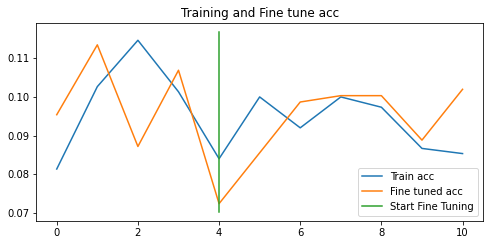

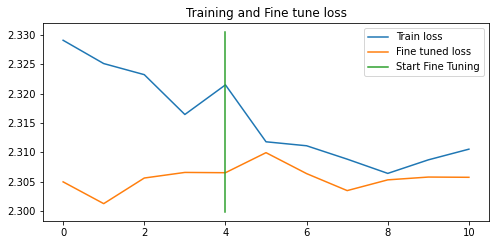

In [ ]:
comp_history(history_2, history_2_aug_data)

## Model_4

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-08-01 09:01:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 142.250.73.240, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   174MB/s    in 2.8s    

2021-08-01 09:01:30 (174 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [ ]:
train_dir_full ="10_food_classes_all_data/train/"
test_data_full = "10_food_classes_all_data/test/"

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_full,
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224),
                                                                 batch_size =32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_full,
                                                                label_mode ="categorical",
                                                                image_size = (224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_aug = tf.keras.Sequential([
                                preprocessing.RandomFlip("horizontal"),
                                preprocessing.RandomRotation(0.2),
                                preprocessing.RandomZoom(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.Rescaling(1/255.0)
], name = "DataAuglayer")

In [ ]:
model_2.load_weights(checkpoint_path)

What we have done is that, in model_1, we have trained it for 5 epochs with feature extraction.
In model 2 we have used data augmentation, in addition to feature extraction.

Model_3 used finetuning on model_2 with checkpoints.
Now we load checkpoints again to get model_2 without fine tuning. Now we shall train it on the whole data.

The model's weights are saved using ModelCheckpointCallback. We saved the same model_2 to with top 10 layers unfrozen ( model_3 ).

Reload model_2 without fine-tune and train on whole data.

In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_8 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
model_2.compile(loss  ="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.0001),
                metrics =["accuracy"])

In [ ]:
history_2_final_finetuned = model_2.fit(train_data, validation_data=test_data,
                                 validation_steps = int(0.25*len(test_data)),
                                 epochs =10,
                                 steps_per_epoch = len(train_data),
                                 initial_epoch = history_2.epoch[-1],
                                 callbacks = [create_tensorboard_callback("Tf_hub","model_2_ft_fulldata")])

In [ ]:
comp_history(history_2_aug_data, history_2_final_finetuned)

In [ ]:
!tensorboard dev upload --logdir ./Tf_hub \ 
  --name "Transfer Learning Experiments" \
  --description "Fine tune and normal expts" \
  --one_shot